# User Analytics in the Telecommunication Industry - Overview 

# Import Packges and Load Data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

In [3]:
# Loan Data
df = pd.read_csv('telcom_data (2).xlsx - Sheet1.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# Check Total Number of Columns and rows
df.shape

(150001, 55)

In [5]:
# Check data types missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
# Check Null Value or missing value
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# Here Seprate numerical and categorical data list are created so all null value can be filled by using loop. 
numerical_data = df.select_dtypes(include = ['float64'])
categorical_data = df.select_dtypes(include = ['object'])

In [8]:
# filled missing value or null value by using median for numerical columns and mode for categorical columns.
for num in numerical_data:
    df[num].fillna(df[num].median(), inplace = True)
for cat in categorical_data:
    df[cat].fillna(df[cat].mode()[0], inplace = True)

In [9]:
# after filled checked value
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [10]:
# Check duplicate value
df.duplicated().sum()

0

# Checking outliers of all numerical data

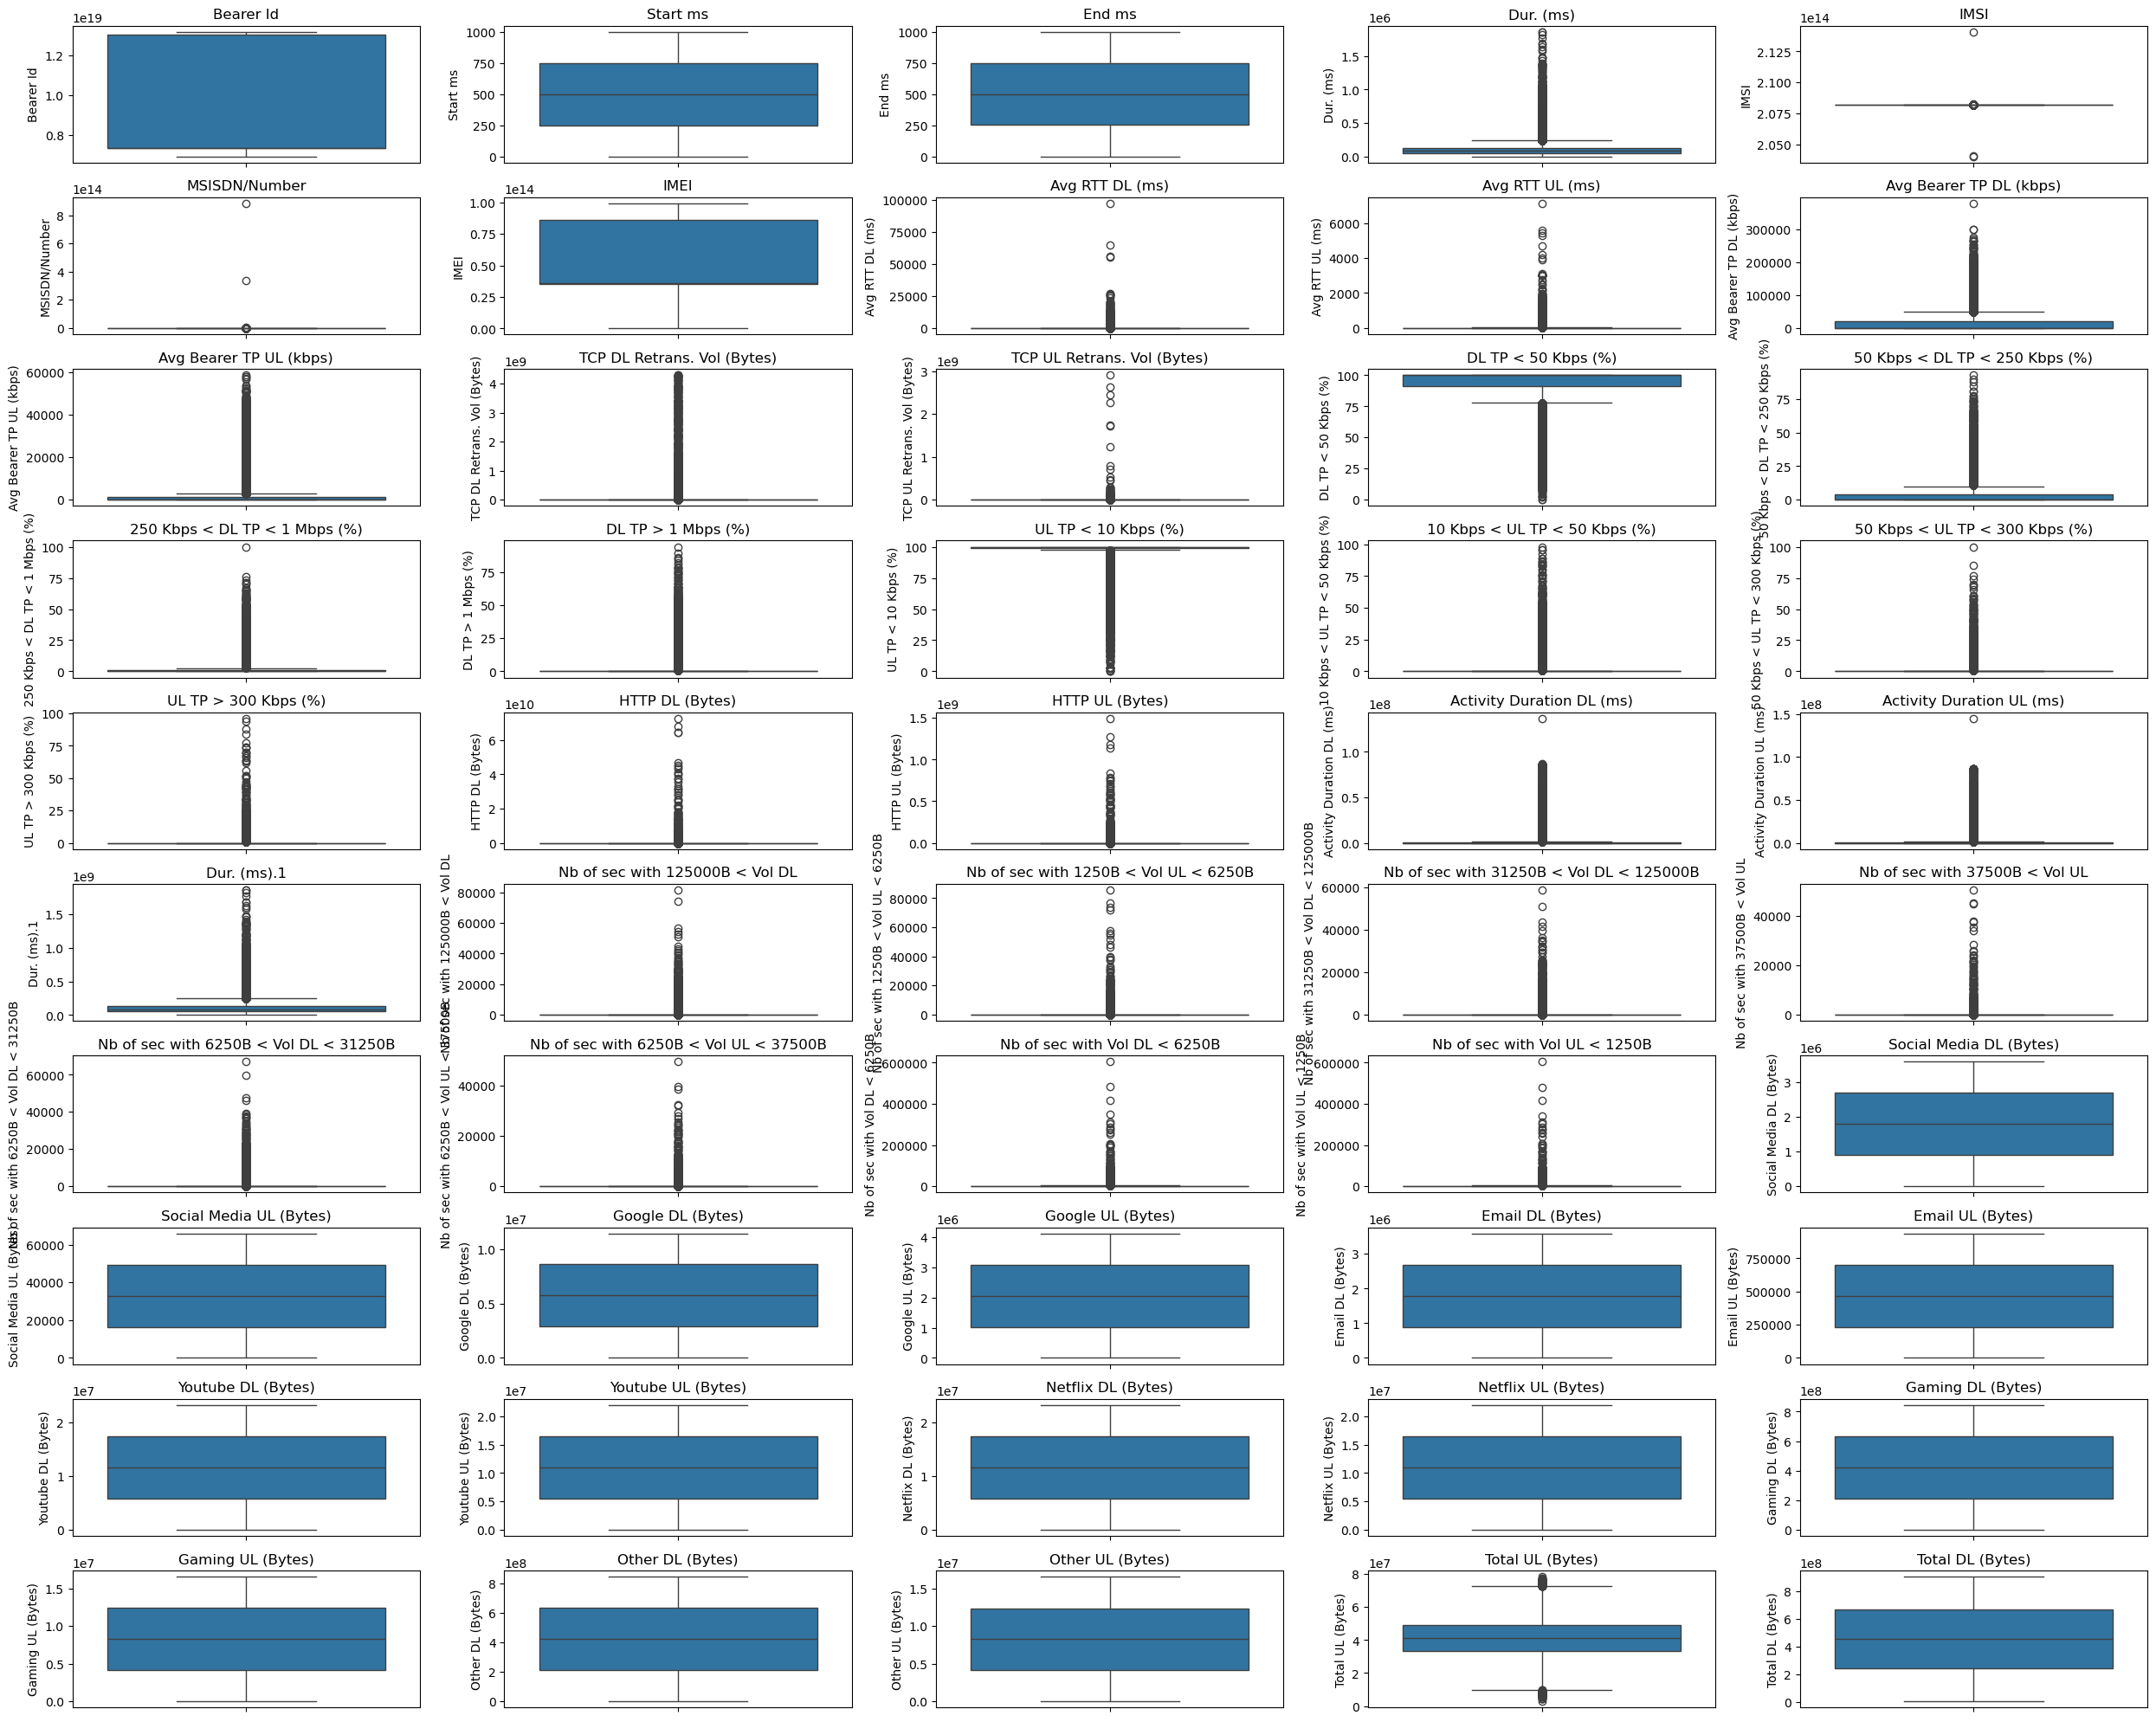

In [12]:
plt.figure(figsize = (25,20))
for i,num in enumerate(numerical_data,1):
    plt.subplot(10,5,i)
    sns.boxplot(y = df[num])
    plt.title(num)
plt.tight_layout()
plt.show()

# Removing Outliers by using IQR (Inter Quartile Range)

In [14]:
# Here, IQR(Inter Quartile Range) Method is used to calculate outliers and capp with Min_value for Lower Value and Max_value for Upper Value.
for num in numerical_data:
    Q1 = df[num].quantile(0.25)
    Q3 = df[num].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = Q1 - 1.5 * IQR
    Max_value = Q3 + 1.5 * IQR
  
    print(f"{num} = Lower Value: {round(Min_value,2)}, Upper Value: {round(Max_value,2)}")
    
# Capping to handle outliers with Max_value and Min_value. 
    df[num] = np.where(df[num] > Max_value,Max_value,
                        np.where(df[num] < Min_value, Min_value,df[num]))

Bearer Id = Lower Value: -1.1889e+18, Upper Value: 2.158118e+19
Start ms = Lower Value: -498.5, Upper Value: 1497.5
End ms = Lower Value: -497.5, Upper Value: 1498.5
Dur. (ms) = Lower Value: -55040.0, Upper Value: 244912.0
IMSI = Lower Value: 208200845751419.0, Upper Value: 208202327120851.0
MSISDN/Number = Lower Value: 33604163418.5, Upper Value: 33730417718.5
IMEI = Lower Value: -40523032568714.5, Upper Value: 162105346385153.5
Avg RTT DL (ms) = Lower Value: -5.5, Upper Value: 102.5
Avg RTT UL (ms) = Lower Value: -9.0, Upper Value: 23.0
Avg Bearer TP DL (kbps) = Lower Value: -29457.5, Upper Value: 49210.5
Avg Bearer TP UL (kbps) = Lower Value: -1562.5, Upper Value: 2729.5
TCP DL Retrans. Vol (Bytes) = Lower Value: 568730.0, Upper Value: 568730.0
TCP UL Retrans. Vol (Bytes) = Lower Value: 20949.5, Upper Value: 20949.5
DL TP < 50 Kbps (%) = Lower Value: 77.5, Upper Value: 113.5
50 Kbps < DL TP < 250 Kbps (%) = Lower Value: -6.0, Upper Value: 10.0
250 Kbps < DL TP < 1 Mbps (%) = Lower V

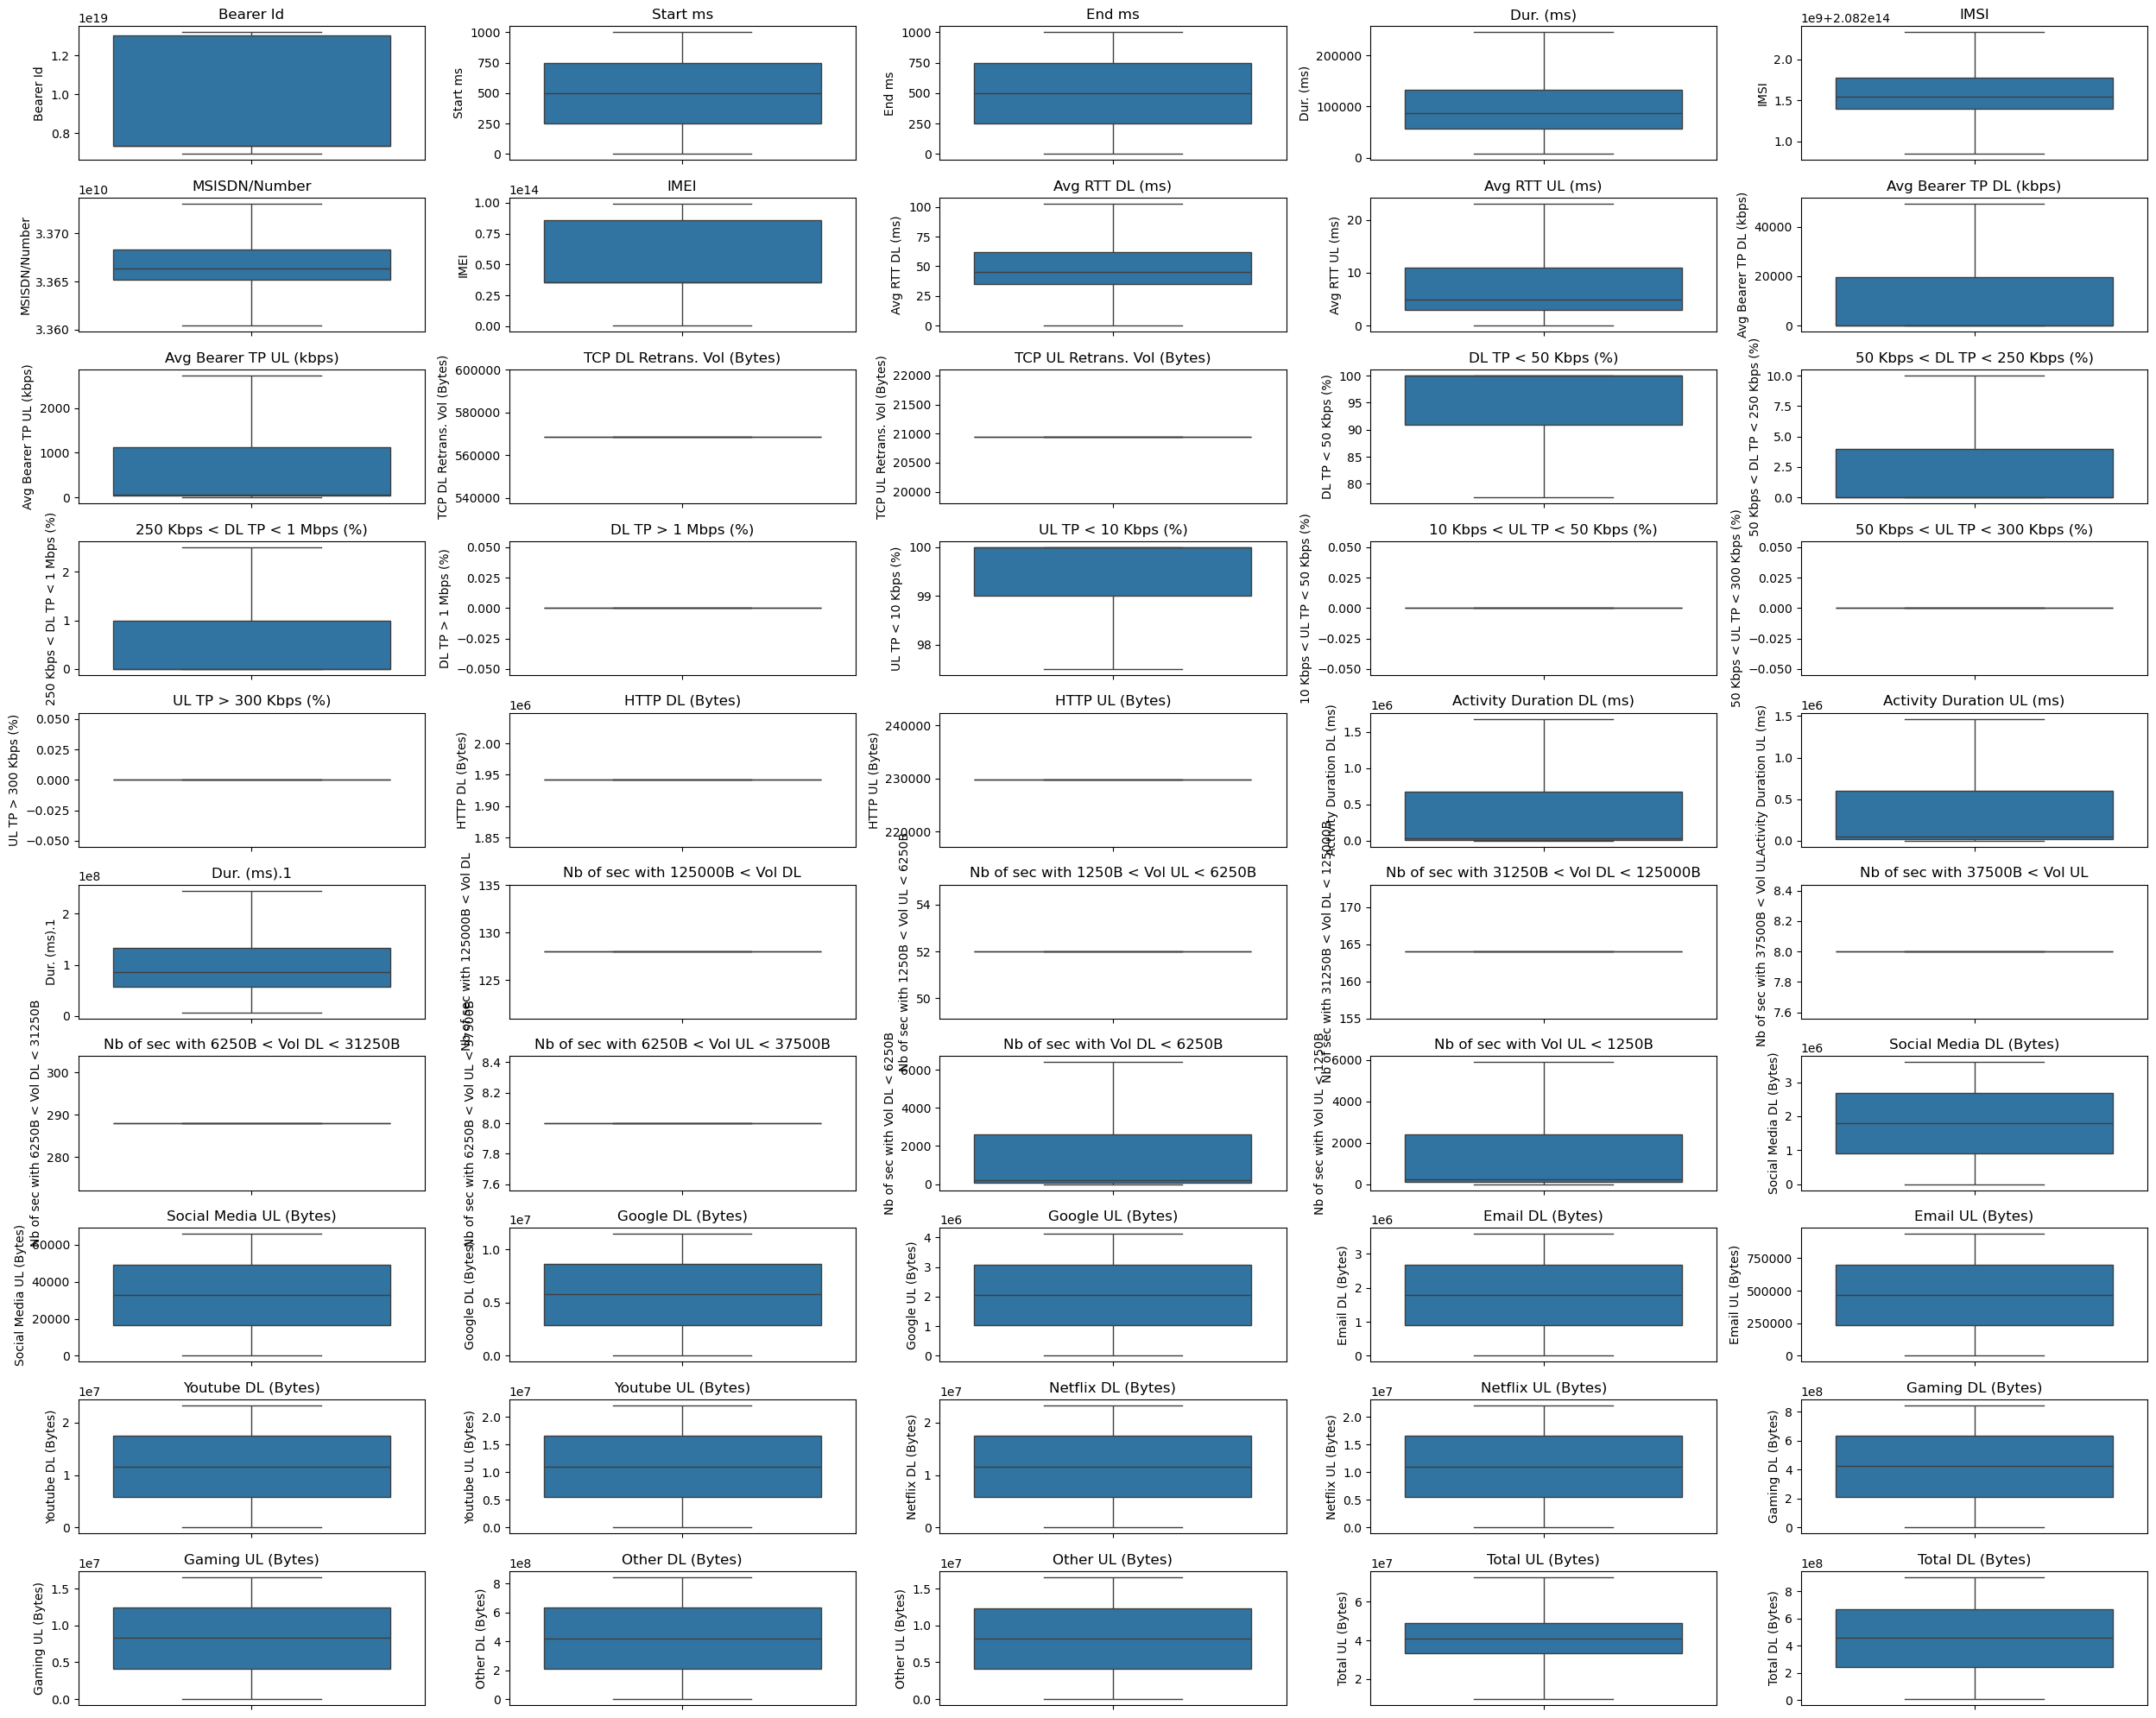

In [15]:
plt.figure(figsize = (25,20))
for i,num in enumerate(numerical_data,1):
    plt.subplot(10,5,i)
    sns.boxplot(y = df[num])
    plt.title(num)
plt.tight_layout()
plt.show()

# 1. User Overview Analysis 

In [17]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


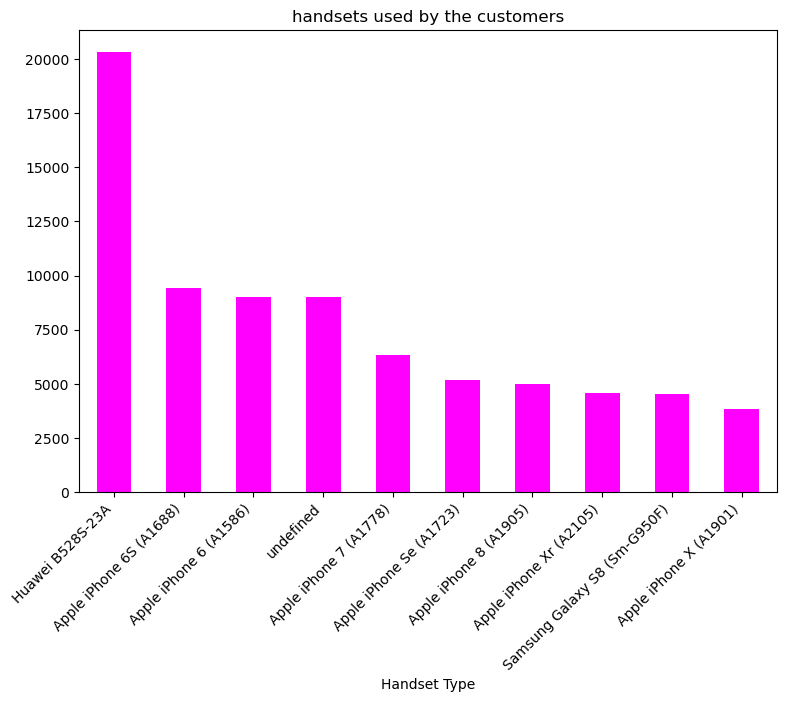

In [18]:
# Start by identifying the top 10 handsets used by the customers.  
plt.figure(figsize = (9,6))
df['Handset Type'].value_counts().head(10).plot( kind = 'bar', color = 'magenta')
plt.title('handsets used by the customers')
plt.xticks(rotation=45, ha='right')
plt.show()

Output:
1) Huawei B528S-23A handset has a highest used by the customers, followed by Apple iPhone 6S (A1688), Apple iPhone 6 (A1586), undefined,
Apple iPhone 7 (A1778), Apple iPhone Se (A1723), Apple iPhone 8 (A1905), Apple iPhone Xr (A2105), Samsung Galaxy S8 (Sm-G950F), Apple iPhone X (A1901) etc.

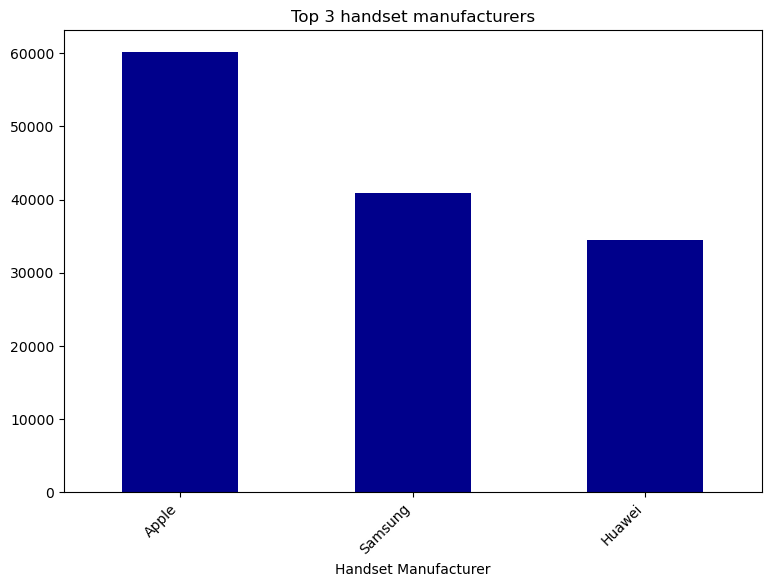

In [20]:
# Identify the top 3 handset manufacturers  
plt.figure(figsize = (9,6))
df['Handset Manufacturer'].value_counts().head(3).plot(kind = 'bar', color = 'darkblue')
plt.title('Top 3 handset manufacturers')
plt.xticks(rotation=45, ha='right')
plt.show()

Output:
1) Highest handsets manufacture by Apple, followed by Samsung and Huawei etc.

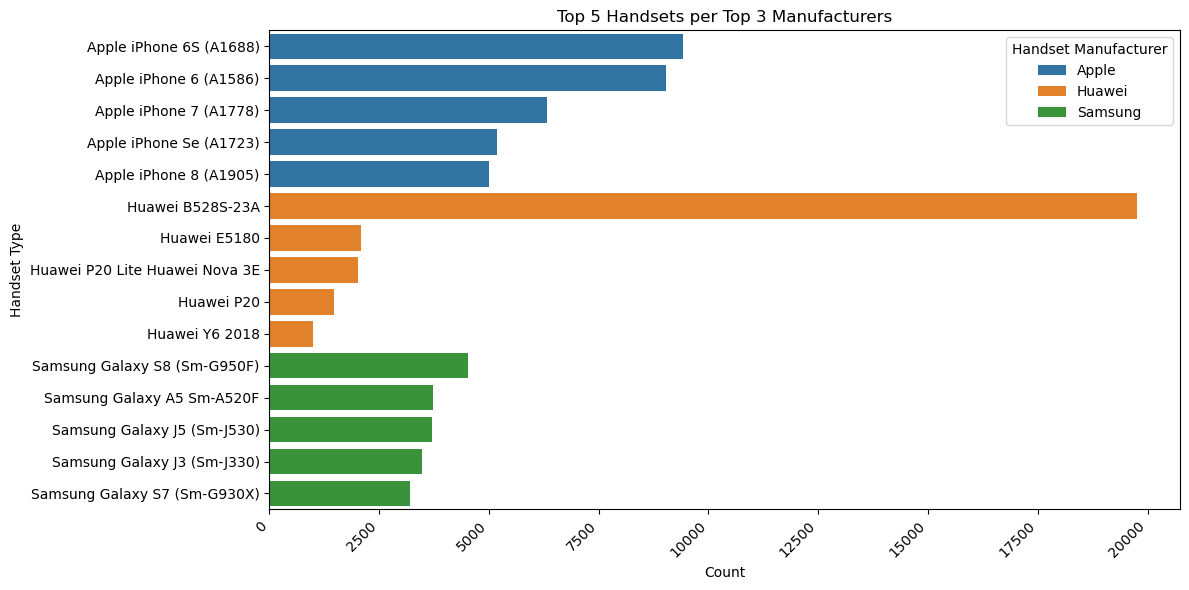

In [22]:
# Identify the top 5 handsets per top 3 handset manufacturer. 
top_three_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
filtered_df = df[df['Handset Manufacturer'].isin(top_three_manufacturers)]
top_5 = (
    filtered_df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name='Count').sort_values(['Handset Manufacturer', 'Count'], 
    ascending=[True,False]).groupby('Handset Manufacturer').head(5))
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5, y='Handset Type', x='Count', hue='Handset Manufacturer', dodge=False)
plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Output:
1) AS we know Apple, Samsung and Huawei are the top most manufacurer of handsets.
2) Apple top 5 handsets are Apple iphone 6S (A1688), Apple iphone 6 (A1586), Apple iphone 7 (A1778), Apple iphone Se (A1712), Apple iphone 8 (A1905) etc.
3) Huawei top 5 handsets are HuaweiB5285-23A, Huawei E5180, Huawei P20 Lite Huawei Nova 3E, Huawei P20, Huawei Y6 2018 etc.
4) Samsung top 5 handsets are Samsung Galaxy S8 (Sm-G950F), Samsung Galaxy A5 Sm-A5020F, Samsung Galaxy j5 (Sm-j530), Samsung Galaxy j3 (Sm-j330), Samsung Galaxy S7 (Sm-G930X) etc.

Interpretation and Recommendation to marketing teams
Interpretation 
1) Apple dominates the handset market among customers, with multiple models (6S, 6, 7, SE, 8, XR, X) ranking in the top 10 most used.
2) Huawei’s B528S-23A is the most used single device, possibly due to its use as a home router or data hub device.
3) Samsung also has strong presence, especially with the Galaxy S and A series models.
4) There is a notable presence of some models, suggesting slower upgrade cycles among users.

Recommendations for Marketing Teams 

1) Target Apple Users: Focus campaigns on iPhone users, especially those with models like (6, 6S, SE). Offer upgrade deals to retain existing Apple users.
2) Device-Based Personalization: Use handset data to personalize promotions — for example, highlight accessory bundles for top models (e.g. iPhone 7, Galaxy S8).
3) Leverage Huawei Data Use Devices: Huawei’s top-used device (B528S-23A) indicates heavy data usage — these users might benefit from high data plan offers.
4) Push Android Device Upgrades: Many Samsung and Huawei users are on mid-range or older models — present compelling switch/upgrade offers for newer Android phones.

# 1.1 Overview of the users’ behavior on the applications like Social Media, Google, Email, YouTube, Netflix, Gaming, and Others. 

In [26]:
# Applications to track
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Step 1: Aggregate general metrics
agg_df = df.groupby('MSISDN/Number').agg(
    number_of_sessions=('Dur. (ms)', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_bytes=('Total DL (Bytes)', 'sum'),
    total_upload_bytes=('Total UL (Bytes)', 'sum')
).reset_index()

# Step 2: Aggregate per application (DL + UL)
for app in apps:
    dl_col = f"{app} DL (Bytes)"
    ul_col = f"{app} UL (Bytes)"
    total_col = f"{app} Total (Bytes)"
    
    app_dl = df.groupby('MSISDN/Number')[dl_col].sum()
    app_ul = df.groupby('MSISDN/Number')[ul_col].sum()
    agg_df[total_col] = agg_df['MSISDN/Number'].map(app_dl + app_ul)
agg_df.head()

,MSISDN/Number,number_of_sessions,total_session_duration,total_download_bytes,total_upload_bytes,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,3.360416e+10,1631,157869435.0,7.432310e+11,6.660241e+10,2.971681e+09,1.278469e+10,3.704599e+09,3.651438e+10,3.640115e+10,7.040380e+11,6.842803e+11
1,3.360417e+10,1,58922.0,5.292440e+08,4.307210e+07,9.188010e+05,4.362016e+06,2.299860e+06,1.954621e+07,2.755807e+07,5.132055e+08,2.212550e+08
2,3.360417e+10,2,212989.0,9.034510e+08,6.479081e+07,2.214142e+06,1.153093e+07,4.457470e+06,3.353502e+07,2.438497e+07,8.778847e+08,1.086051e+09
3,3.360418e+10,1,127367.0,7.154997e+08,3.793038e+07,3.451216e+06,3.368250e+05,3.931763e+06,9.879322e+06,3.458355e+07,6.953183e+08,2.068831e+08
4,3.360418e+10,1,45126.0,2.278016e+08,4.454165e+07,2.538148e+06,7.159353e+06,3.871069e+06,2.779988e+07,1.903087e+07,2.009846e+08,8.461103e+08


OutCome : - Interpretation of above  users’ behavior 

1) The aggregated telecom usage data reveals significant variability in user behavior, both in terms of session activity and data consumption. While many users exhibit casual usage patterns, a notable portion are heavy users—especially for data-intensive activities like video streaming (YouTube, Netflix) and gaming.

2) Session frequency ranges widely, from minimal to thousands of sessions, and session duration further highlights diverse engagement levels. Download volumes are consistently much higher than uploads, in line with typical consumer habits.

3) The "Other" app category contributes substantially to total usage, suggesting the presence of unclassified or lesser-known apps with high data demands. This, combined with high usage from social media and video apps, indicates opportunities for user segmentation, customized data plans, and network optimization.

# 1.2: Exploratory Data Analysis (EDA)

# 1. Describe Variables and Data Types

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

Outcome:
1) Only five columns data types are Object like Start, End, Last Location Name, Handset Manufacturer and Handset Type etc.
2) Remaining all data types are float.
3) All Missing value or Null Values are already filled.
4) There is no integer value are in columns.

# 2. Basic Metrics

In [33]:
print(df.describe())

          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.012045e+19     499.188199     498.800888   99572.007587   
std    2.892435e+18     288.610872     288.096693   59084.192486   
min    6.917540e+18       0.000000       0.000000    7142.000000   
25%    7.349880e+18     250.000000     251.000000   57442.000000   
50%    7.349880e+18     499.000000     500.000000   86399.000000   
75%    1.304240e+19     749.000000     750.000000  132430.000000   
max    1.318650e+19     999.000000     999.000000  244912.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082015e+14   3.366886e+10  4.842592e+13        51.722535   
std    3.924977e+08   3.368477e+07  2.238739e+13        24.537364   
min    2.082008e+14   3.360416e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365151e+10  3.5462

Outcome:
1) Large standard deviations in duration, throughput, and download volumes indicate a highly diverse user base, ranging from light users to heavy streamers/gamers.
2) A significant gap between mean and median for multiple features (esp. session duration and throughput) suggests positive skew and presence of outliers (extreme usage sessions).
3) Gaming and Other apps show very high average data consumption, hinting at potential network strain or monetization opportunity.
4) YouTube and Netflix usage are fairly consistent, likely due to adaptive streaming mechanisms or usage caps per session.

# 3. Non-Graphical Univariate Analysis

In [36]:
for col in numerical_data:
    col_range = df[col].max() - df[col].min()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    variance = df[col].var()
    std_dev = df[col].std()
    mean = df[col].mean()
    cv = std_dev / mean if mean != 0 else float('nan')
    print(f"{col} - Range: {col_range}, IQR: {iqr}, Variance: {variance}, Coefficient of Variation: {cv}")

Bearer Id - Range: 6.26896e+18, IQR: 5.69252e+18, Variance: 8.366180088569975e+36, Coefficient of Variation: 0.28580113647162697
Start ms - Range: 999.0, IQR: 499.0, Variance: 83296.23555432424, Coefficient of Variation: 0.5781604471606959
End ms - Range: 999.0, IQR: 499.0, Variance: 82999.70445414669, Coefficient of Variation: 0.5775785485237646
Dur. (ms) - Range: 237770.0, IQR: 74988.0, Variance: 3490941801.7679453, Coefficient of Variation: 0.5933815528926291
IMSI - Range: 1481369432.0, IQR: 370342358.0, Variance: 1.540544123633147e+17, Coefficient of Variation: 1.885181558685979e-06
MSISDN/Number - Range: 126254300.0, IQR: 31563575.0, Variance: 1134663448412869.2, Coefficient of Variation: 0.0010004724359605301
IMEI - Range: 98561186125774.0, IQR: 50657094738467.0, Variance: 5.011953458299865e+26, Coefficient of Variation: 0.46230186647196797
Avg RTT DL (ms) - Range: 102.5, IQR: 27.0, Variance: 602.0822394288722, Coefficient of Variation: 0.4744037403255714
Avg RTT UL (ms) - Range:

OutCome:
1) High Variation in User Behavior: Session duration, throughput, and data volumes show high standard deviation → users have diverse engagement patterns.
2) Skewed Distributions & Outliers: Mean > Median for many features indicates right skew and presence of outliers, especially in session time and gaming data.
3) Consistent Streaming Usage: YouTube & Netflix usage is fairly consistent across users (low variation) → suitable for targeted content/data plans.
4) Zero-Variance Features: Some features (e.g., TCP retransmission, HTTP bytes) have 0 variance → they can be removed during preprocessing.
5) Device & Network Diversity: IMEI shows variation → users have diverse handsets.High variation in RTT & throughput → network quality differs significantly across users.

# 4. Graphical Univariate Analysis:

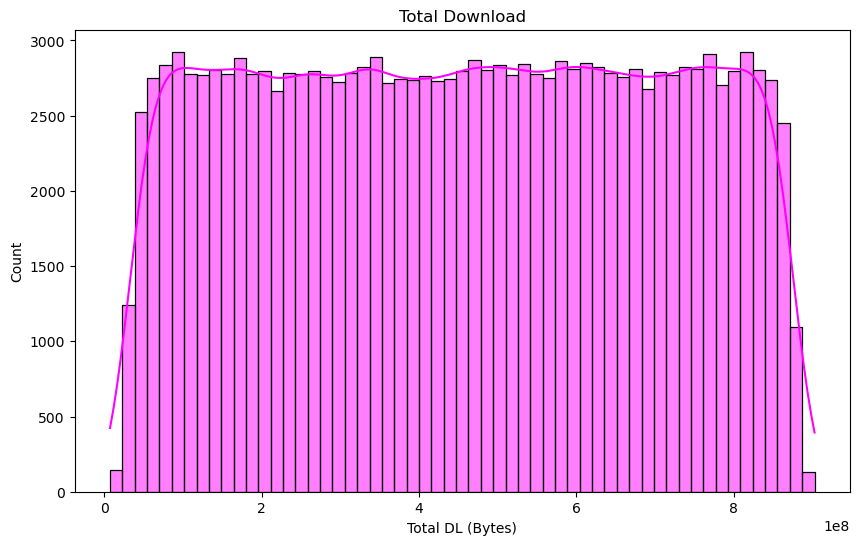

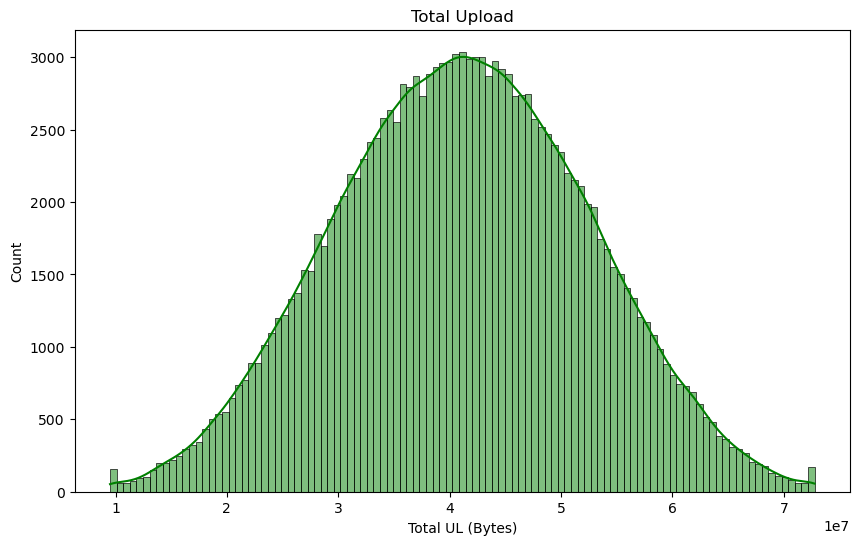

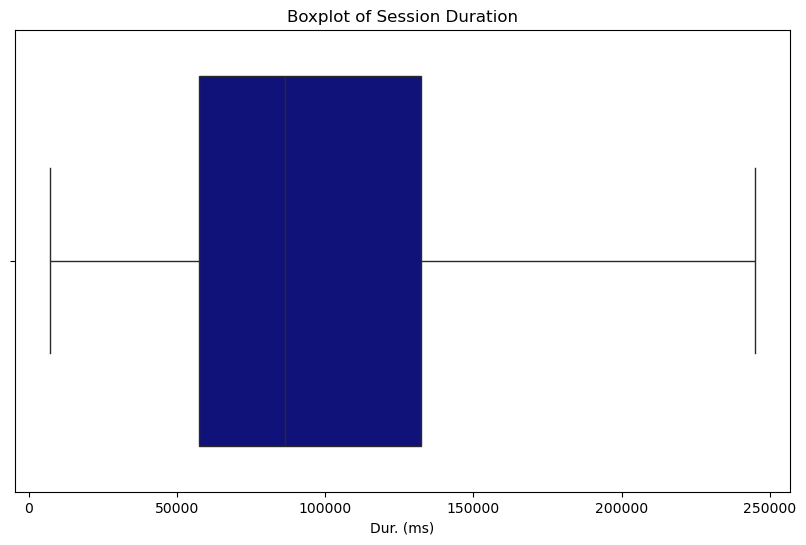

In [39]:
plt.figure(figsize = (10,6))
sns.histplot(df['Total DL (Bytes)'], color= 'Magenta', kde = True)
plt.title('Total Download')
plt.show()

plt.figure(figsize = (10,6))
sns.histplot(df['Total UL (Bytes)'], color= 'green', kde = True)
plt.title('Total Upload')
plt.show()

# Boxplot for duration
plt.figure(figsize = (10,6))
sns.boxplot(x=df['Dur. (ms)'],color = 'darkblue')
plt.title('Boxplot of Session Duration')
plt.show()

OutCome:
1) Download volumes are consistently much higher than uploads, in line with typical consumer habits.
2) Upload activity is generally much lower, as expected in typical consumer behavior.
3) Most users have standard session lengths, but some have unusually long sessions, possibly due to streaming or idle connections.


# 5.Bivariate Analysis

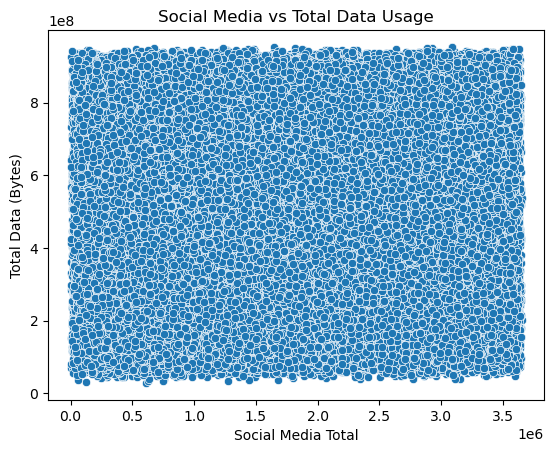

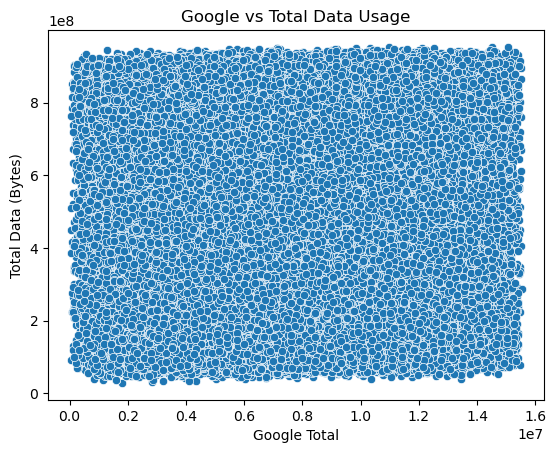

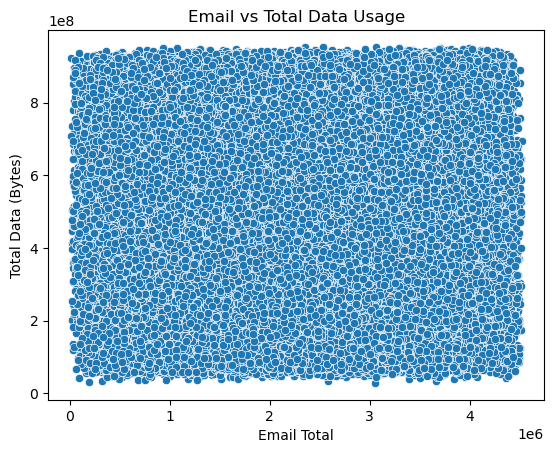

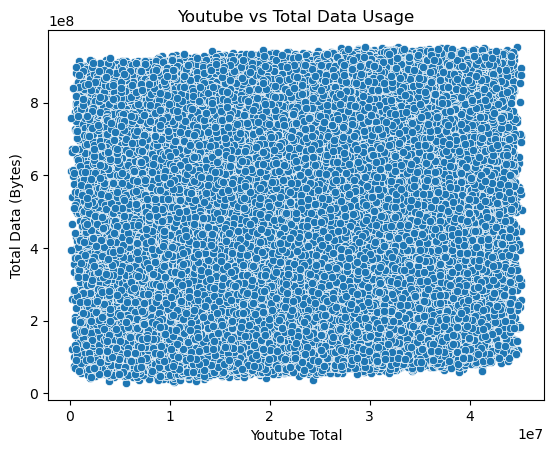

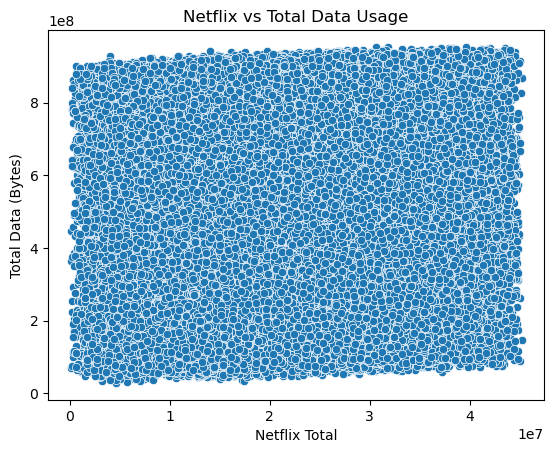

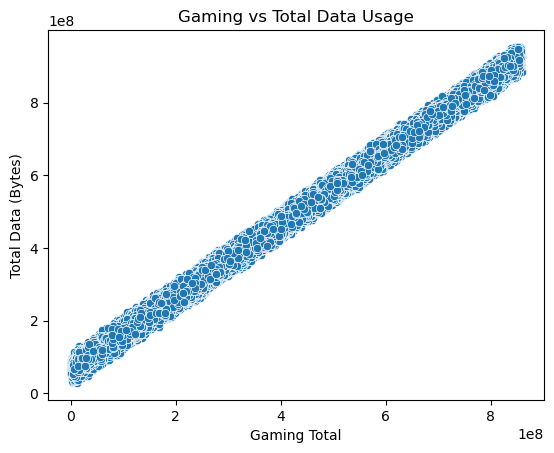

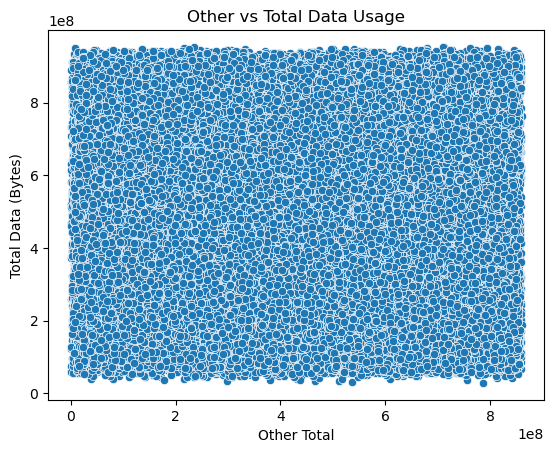

In [42]:
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
for app in apps:
    df[f'{app} Total'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']
    sns.scatterplot(x=df[f'{app} Total'], y=df['Total Data (Bytes)'])
    plt.title(f'{app} vs Total Data Usage')
    plt.show()

# 6. Variable transformations

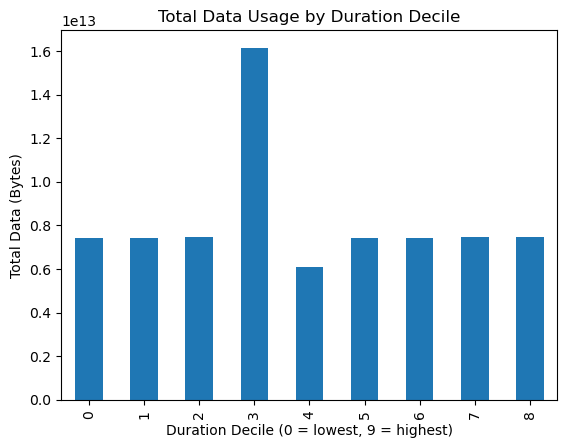

In [44]:
df['duration_decile'] = pd.qcut(df['Dur. (ms)'], 10, labels=False, duplicates='drop')
decile_usage = df.groupby('duration_decile')['Total Data (Bytes)'].sum()
decile_usage.plot(kind='bar', title='Total Data Usage by Duration Decile')
plt.ylabel('Total Data (Bytes)')
plt.xlabel('Duration Decile (0 = lowest, 9 = highest)')
plt.show()

Output:
1) Higher session duration → higher data usage: Users in top deciles consume significantly more data.
2) Top decile users = heavy data consumers: Likely streaming, gaming, or using data-intensive apps.
3) Lower decile users = light users: Possibly casual browsers or inactive users.

# 7. Correlation Analysis 

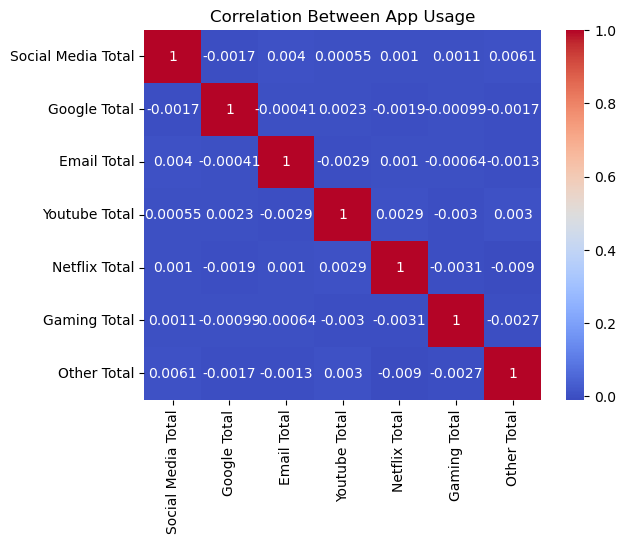

In [47]:
app_cols = [f'{app} Total' for app in apps]
correlation_matrix = df[app_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between App Usage')
plt.show()

OutCome:
1) Most application usage variables show very low or no correlation with each other.
2) All other cross-application correlations (e.g., Social Media vs Gaming, Netflix vs Email) are close to 0, indicating independent usage patterns.
3) Slight positive correlation (0.01) between Social Media and Other data may suggest a small overlap in user behavior across these two categories.

# 8. Dimensionality Reduction

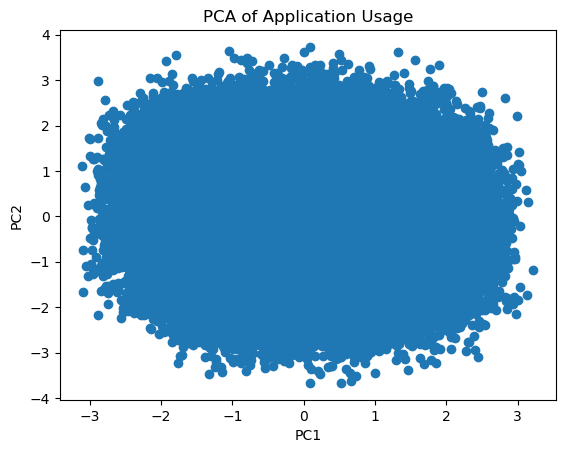

[0.14435994 0.14375118]


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[app_cols]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plot PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Application Usage')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Explained variance
print(pca.explained_variance_ratio_)


Outcome:
1) Low Variance Explained: The first two principal components explain only about 28.8% of the total variance (14.4% + 14.3%), suggesting that the original features have high dimensionality and are not easily compressed.
2) No Dominant Patterns: Since no component explains a large chunk of variance, it implies no single or pair of applications dominate user behavior trends.
3) Data Spread is Uniform: The fairly equal variance in PC1 and PC2 suggests that data variability is distributed across many features rather than being concentrated.
4) Limited Dimensionality Reduction: This PCA result shows limited effectiveness in reducing dimensions without losing significant information — more components would be needed for better summarization.

# 2. User Engagement Analysis  

# 2.1 Aggregate Engagement Metrics per User (MSISDN)

In [54]:
# Engagement metrics per user
engagement = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                   
    'Dur. (ms)': 'sum',                     
    'Total UL (Bytes)': 'sum',            
    'Total DL (Bytes)': 'sum'              
}).reset_index()

engagement.rename(columns={
    'Bearer Id': 'Session Count',
    'Dur. (ms)': 'Total Duration',
    'Total UL (Bytes)': 'Total UL',
    'Total DL (Bytes)': 'Total DL'
}, inplace=True)

engagement['Total Traffic'] = engagement['Total UL'] + engagement['Total DL']


# 2.2 Top 10 Users per Metric

In [56]:
# Top 10 users per engagement metric
top_sessions = engagement.nlargest(10, 'Session Count')
top_duration = engagement.nlargest(10, 'Total Duration')
top_traffic = engagement.nlargest(10, 'Total Traffic')

print("Top 10 Users by Sessions:\n", top_sessions)
print("Top 10 Users by Duration:\n", top_duration)
print("Top 10 Users by Traffic:\n", top_traffic)


Top 10 Users by Sessions:
        MSISDN/Number  Session Count  Total Duration      Total UL  \
89091   3.373042e+10          23317    2.364114e+09  9.586824e+11   
0       3.360416e+10           1631    1.578694e+08  6.660241e+10   
52434   3.366371e+10           1067    6.973136e+07  4.442003e+10   
12316   3.362632e+10             18    4.004601e+06  6.696507e+08   
5227    3.361489e+10             17    3.897579e+06  6.894830e+08   
11970   3.362578e+10             17    4.135260e+06  7.295774e+08   
35842   3.365973e+10             16    3.490608e+06  6.242603e+08   
75153   3.367588e+10             15    3.330261e+06  5.815688e+08   
63908   3.366716e+10             13    3.111859e+06  5.663264e+08   
69      3.360452e+10             12    2.778163e+06  3.917759e+08   

           Total DL  Total Traffic  
89091  1.053428e+13   1.149296e+13  
0      7.432310e+11   8.098334e+11  
52434  4.875453e+11   5.319653e+11  
12316  7.301517e+09   7.971167e+09  
5227   8.156743e+09   8.8462

Output:
1) Top 10 Users by Session Count: These users have the highest number of sessions, indicating frequent use of the network. User ID 89091 stands out significantly with over 23,000 sessions, far above others — a power user or possibly a bot or automated system.
2) Top 10 Users by Total Duration: These users spend the most time connected, showing prolonged app or internet usage. Again, User ID 89091 is on top, confirming both high session frequency and long durations — very high engagement.
3) Top 10 Users by Total Traffic: These users consume the most data (upload + download), indicating heavy content usage like streaming or downloads. User ID 89091 is the clear leader here too, consuming ~11.5 TB, suggesting either heavy video usage or enterprise-level activity.

# 2.3 Normalize & Cluster Users (K=3)

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Selecting and normalizing relevant features
features = engagement[['Session Count', 'Total Duration', 'Total Traffic']]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement['Engagement Cluster'] = kmeans.fit_predict(features_scaled)


# 2.4 Cluster Statistics & Visualization

                   Session Count                              Total Duration  \
                             min    max          mean     sum            min   
Engagement Cluster                                                             
0                              1     18      1.391709  123986   7.146000e+03   
1                          23317  23317  23317.000000   23317   2.364114e+09   
2                           1067   1631   1349.000000    2698   6.973136e+07   

                                                             Total Traffic  \
                             max          mean           sum           min   
Engagement Cluster                                                           
0                   4.135260e+06  1.385602e+05  1.234419e+10  3.324901e+07   
1                   2.364114e+09  2.364114e+09  2.364114e+09  1.149296e+13   
2                   1.578694e+08  1.138004e+08  2.276008e+08  5.319653e+11   

                                                  

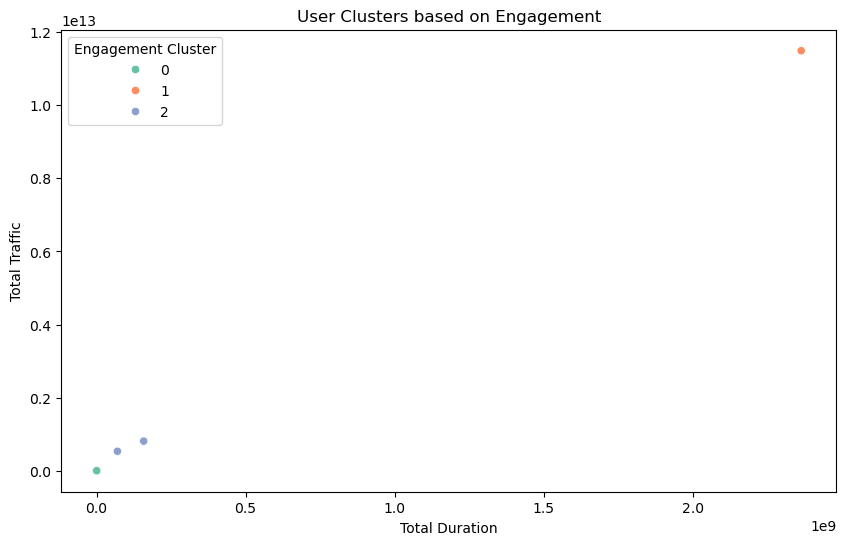

In [61]:
# Cluster-wise descriptive stats
cluster_summary = engagement.groupby('Engagement Cluster')[['Session Count', 'Total Duration', 'Total Traffic']].agg(['min', 'max', 'mean', 'sum'])
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=engagement, x='Total Duration', y='Total Traffic', hue='Engagement Cluster', palette='Set2')
plt.title('User Clusters based on Engagement')
plt.xlabel('Total Duration')
plt.ylabel('Total Traffic')
plt.show()

OutCome:
1) Cluster 0 – Low Engagement: Low session count (1–18) and short durations. Minimal data usage (~69 MB avg, ~8.8 GB max). Represents the majority of casual or infrequent users.
2) Cluster 1 – Ultra High Engagement (Outlier): Only one user (23317 sessions, ~11.5 TB of data, 2.3B ms duration). Clearly an extreme outlier, likely a heavy enterprise user or system process. Should be treated separately in business strategy and resource allocation.
3) Cluster 2 – Medium to High Engagement: Moderate session counts (1067–1631) with significant duration and data (~670 GB avg traffic). Likely includes power users or heavy consumers of video and gaming apps.

# 2.5 Top 10 Most Engaged Users per Application

In [64]:
top_users_by_app = {}

for app in apps:
    df[f'{app} Total'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']
    app_usage = df.groupby('MSISDN/Number')[f'{app} Total'].sum().nlargest(10)
    top_users_by_app[app] = app_usage

# Display top 10 users for one example app
print("Top 10 Users for YouTube:\n", top_users_by_app['Youtube'])


Top 10 Users for YouTube:
 MSISDN/Number
3.373042e+10    5.297344e+11
3.360416e+10    3.651438e+10
3.366371e+10    2.435073e+10
3.362578e+10    4.529588e+08
3.361489e+10    3.943702e+08
3.362632e+10    3.744830e+08
3.367588e+10    3.174106e+08
3.366716e+10    3.152313e+08
3.362708e+10    3.087908e+08
3.369879e+10    3.026620e+08
Name: Youtube Total, dtype: float64


OutCome:
1) User 3.373042e+10 dominates YouTube usage with ~529 GB, far ahead of others.
2) The second and third users consumed ~36.5 GB and ~24.4 GB, respectively.
3) Remaining users have usage between ~300 MB to ~450 MB, showing a sharp drop after top 3.

# 2.6 Plot Top 3 Most Used Applications

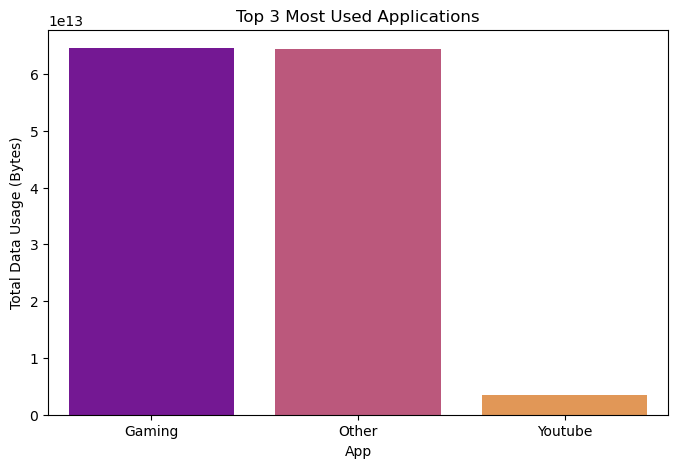

In [67]:
# Aggregate total usage per app
app_totals = {app: df[f'{app} Total'].sum() for app in apps}
app_totals_df = pd.DataFrame(app_totals.items(), columns=['App', 'Total Bytes'])

# Plot top 3
top_apps = app_totals_df.nlargest(3, 'Total Bytes')
plt.figure(figsize=(8,5))
sns.barplot(data=top_apps, x='App', y='Total Bytes', palette='plasma')
plt.title('Top 3 Most Used Applications')
plt.ylabel('Total Data Usage (Bytes)')
plt.show()

Oucome:
1) Gaming and Other Application are used highest as compare to others applications. 
2) Youtube comes in third position.

# 2.7 Optimal K using Elbow Method

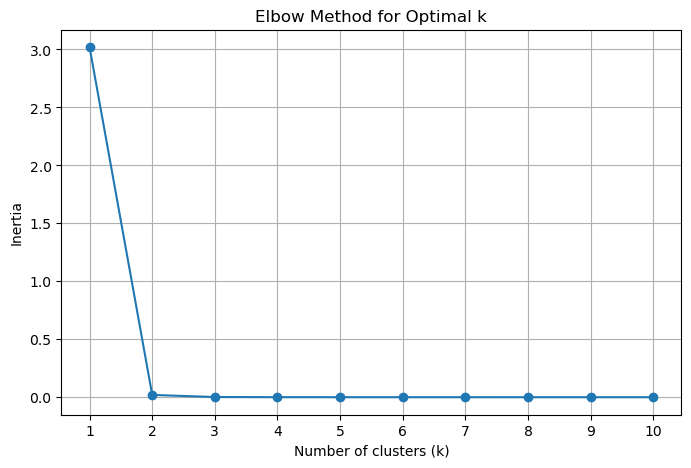

In [70]:
# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.savefig
plt.show()


Outcome:
1) Sharp drop from k=1 to k=2: A significant reduction in inertia indicates that dividing the data into 2 clusters greatly improves cohesion within clusters.
2) Inertia nearly flat from k=2 onward: Very minimal decrease in inertia beyond 2 clusters, suggesting that additional clusters do not add much value.
3) The “elbow” point appears at k=2, where the rate of inertia reduction sharply levels off.
4) This suggests that 2 clusters is the optimal choice, balancing simplicity with improved clustering performance.
5) Beyond 2 clusters, diminishing returns are observed in terms of better intra-cluster compactness.

# 3. Experience Analytics

# 3.1: Aggregate User Experience Metrics per Customer

In [74]:
# Calculate the average RTT, TCP Retransmission, and Throughput
df['Avg_TCP_Retransmission'] = df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean(axis=1)
df['Avg_RTT'] = df[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)
df['Avg_Throughput'] = df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean(axis=1)

# Group by user (MSISDN/Number) and aggregate
aggregated_data = df.groupby('MSISDN/Number').agg(
    Avg_TCP_Retransmission=('Avg_TCP_Retransmission', 'mean'),
    Avg_RTT=('Avg_RTT', 'mean'),
    Avg_Throughput=('Avg_Throughput', 'mean'),
    Handset_Type=('Handset Type', 'first')  # Assuming each user has a single handset type
).reset_index()

# 3.2: Top, Bottom, and Most Frequent Values

In [76]:
def get_value_stats(col):
    print(f"\nTop 10 {col} values:")
    print(df[col].sort_values(ascending=False).head(10))

    print(f"\nBottom 10 {col} values:")
    print(df[col].sort_values().head(10))

    print(f"\nMost frequent {col} values:")
    print(df[col].value_counts().head(10))

get_value_stats('Avg_TCP_Retransmission')
get_value_stats('Avg_RTT')
get_value_stats('Avg_Throughput')



Top 10 Avg_TCP_Retransmission values:
0         294839.75
100013    294839.75
99997     294839.75
99998     294839.75
99999     294839.75
100000    294839.75
100001    294839.75
100002    294839.75
100003    294839.75
100004    294839.75
Name: Avg_TCP_Retransmission, dtype: float64

Bottom 10 Avg_TCP_Retransmission values:
0         294839.75
99996     294839.75
99997     294839.75
99998     294839.75
99999     294839.75
100000    294839.75
100001    294839.75
99995     294839.75
100002    294839.75
100004    294839.75
Name: Avg_TCP_Retransmission, dtype: float64

Most frequent Avg_TCP_Retransmission values:
Avg_TCP_Retransmission
294839.75    150001
Name: count, dtype: int64

Top 10 Avg_RTT values:
75085     62.75
77074     62.75
59406     62.75
49638     62.75
77072     62.75
14216     62.75
41070     62.75
59403     62.75
22852     62.75
140212    62.75
Name: Avg_RTT, dtype: float64

Bottom 10 Avg_RTT values:
42602     0.0
124538    0.0
143878    0.0
103321    0.0
71738     1.0
144

OutCome:
1) Top, Bottom, and Most Frequent values are identical (294839.75). This indicates no variation in the average TCP retransmission across users — likely due to:
A default value used to fill missing data, or All users having identical values in the original data.
2) TCP retransmission may not be a reliable differentiator in this dataset due to uniformity — it possibly requires rechecking data preprocessing.
3) Top values go up to 62.75 ms, with many users having the exact same max value. Bottom values include 0.0 ms to ~3.0 ms, indicating highly responsive connections.
4) Most frequent values are: 25.0 ms (most common), Others like 14.5, 19.5, 20.0, 15.0 etc.
5) RTT values are more diverse and can indicate varying network latency among users. A typical RTT hovers around 25 ms, which is relatively good. Extremely low values (near 0) may indicate local connections or sensor error.
6) Top throughput: 25970 kbps, shared by multiple users — likely high-speed users or possibly capped at a max value. Bottom throughput: 0.0 kbps, suggests no data activity for those users.
7) Most frequent: 25970.0 kbps (most frequent — could be a capped value), Followed by more realistic values like 31.5, 7.5, 48.5 kbps etc.
8) There's a wide range in throughput, from 0 to ~26 Mbps. This indicates a high disparity in user network experience — possibly affected by location, device, or network load.

# 3.3: Distributions and Visual Insights

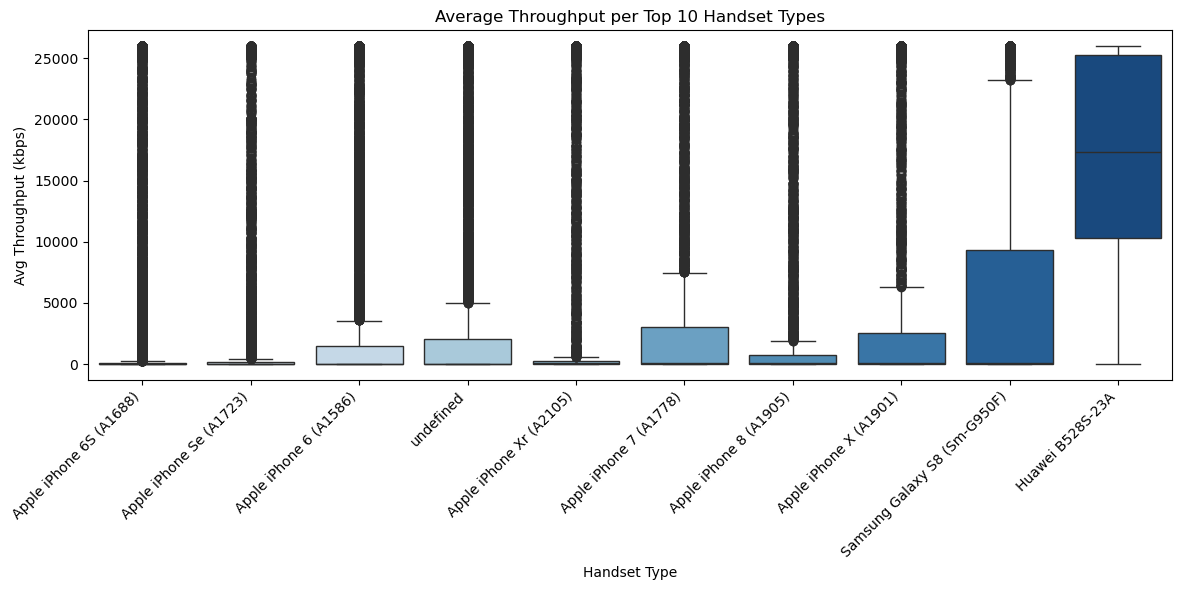

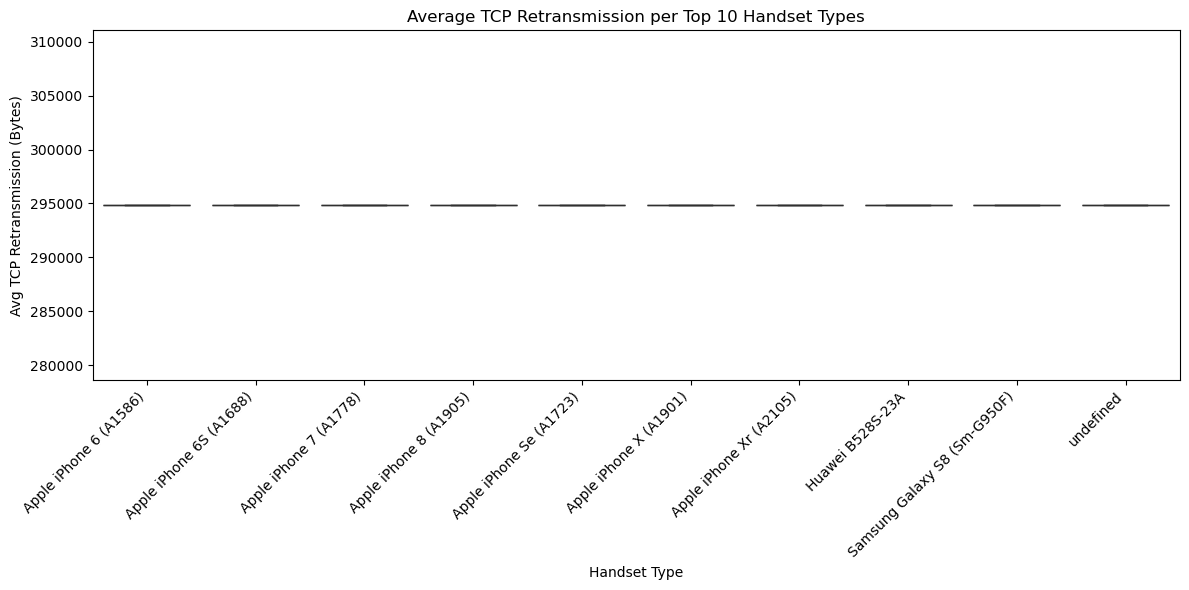

In [79]:
# Top 10 most frequent Handset Types
top_handsets = df['Handset Type'].value_counts().head(10).index
filtered_df = df[df['Handset Type'].isin(top_handsets)]

# Sort handsets by median throughput for better plot order
throughput_medians = filtered_df.groupby('Handset Type')['Avg_Throughput'].median().sort_values()
ordered_handsets = throughput_medians.index

#  Throughput Distribution by Handset Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Handset Type', y='Avg_Throughput', order=ordered_handsets, palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title("Average Throughput per Top 10 Handset Types")
plt.ylabel("Avg Throughput (kbps)")
plt.xlabel("Handset Type")
plt.tight_layout()
plt.show()

#  TCP Retransmission by Handset Type
tcp_medians = filtered_df.groupby('Handset Type')['Avg_TCP_Retransmission'].median().sort_values()
ordered_tcp_handsets = tcp_medians.index

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Handset Type', y='Avg_TCP_Retransmission', order=ordered_tcp_handsets, palette='Oranges')
plt.xticks(rotation=45, ha='right')
plt.title("Average TCP Retransmission per Top 10 Handset Types")
plt.ylabel("Avg TCP Retransmission (Bytes)")
plt.xlabel("Handset Type")
plt.tight_layout()
plt.show()



Outcome:

A)  Average Throughput per Top 10 Handset Types
1) There is notable variation in throughput across handset types. Huawei B525S-23A and Samsung Galaxy S9 users show a wider range and higher median throughput values, indicating better network performance.
Most Apple devices (like iPhone 6, 7, 8, X, SE) have a lower median throughput, with many values clustered near the lower range. The "undefined" handset category performs poorly, possibly representing legacy or poorly identified devices.
2) Device type influences throughput. More recent or higher-end handsets (e.g., Huawei B525S-23A) may support better network technology (e.g., 4G+, 5G), resulting in superior throughput. Apple devices show relatively lower performance in this dataset, possibly due to hardware limitations or user network conditions.

   
B) Average TCP Retransmission per Top 10 Handset Types
1) All handset types show identical average TCP retransmission values (~294839.75). There is no visible variation, and the boxplot is flat across all devices.
2) TCP retransmission values appear to be uniform across all handset types, suggesting: A data quality issue (e.g., missing values imputed with a fixed number). Or this metric is not device-dependent in this dataset.
3) This makes TCP retransmission unsuitable for comparative analysis across devices in its current state.

# 3.4: K-Means Clustering on Experience Metrics

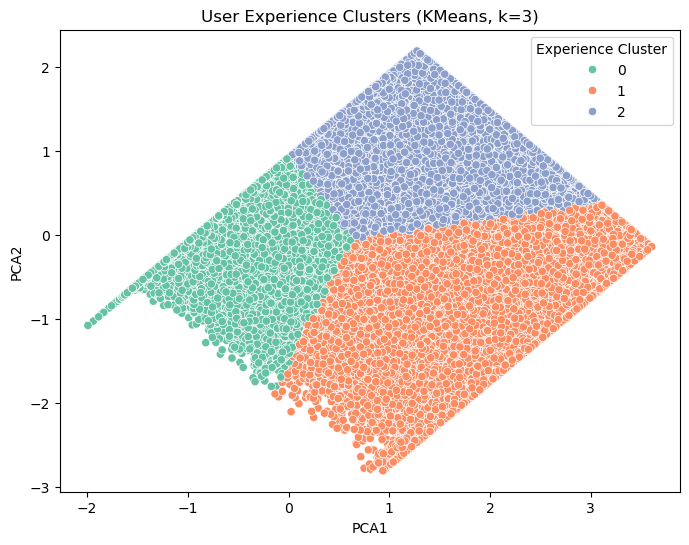

                   TCP_Retransmission                             RTT        \
                                 mean       min       max        mean   min   
Experience Cluster                                                            
0                            589679.5  589679.5  589679.5   44.724761   0.0   
1                            589679.5  589679.5  589679.5   69.697660  19.0   
2                            589679.5  589679.5  589679.5  104.822985  70.5   

                              Throughput                    
                       max          mean      min      max  
Experience Cluster                                          
0                    77.25   2475.902009      0.0  28938.0  
1                   125.50  39301.139677  18113.5  51940.0  
2                   125.50  10491.335768      0.0  40441.5  


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#  Create User Experience Aggregation
user_experience = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

#  Feature Engineering
user_experience['TCP_Retransmission'] = user_experience['TCP DL Retrans. Vol (Bytes)'] + user_experience['TCP UL Retrans. Vol (Bytes)']
user_experience['RTT'] = user_experience['Avg RTT DL (ms)'] + user_experience['Avg RTT UL (ms)']
user_experience['Throughput'] = user_experience['Avg Bearer TP DL (kbps)'] + user_experience['Avg Bearer TP UL (kbps)']

# Select features for clustering
features = ['TCP_Retransmission', 'RTT', 'Throughput']

#  Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_experience[features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
user_experience['Experience Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
user_experience['PCA1'], user_experience['PCA2'] = X_pca[:, 0], X_pca[:, 1]

#  Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_experience, x='PCA1', y='PCA2', hue='Experience Cluster', palette='Set2')
plt.title('User Experience Clusters (KMeans, k=3)')
plt.show()

# Cluster Summary
cluster_summary = user_experience.groupby('Experience Cluster')[features].agg(['mean', 'min', 'max'])
print(cluster_summary)


OutCome:
1) The scatterplot shows a clear separation of users into 3 distinct clusters based on network experience.
2) PCA1 and PCA2 effectively reduce dimensionality while preserving cluster structure.
3) Cluster 0: Likely represents users with poor throughput and low RTT — possibly older handsets or in poor coverage areas.
4) Cluster 1: Represents best network experience — high throughput and moderate latency.
5) Cluster 2: Indicates high latency and moderate throughput — may suggest network congestion or suboptimal routing.
6) TCP Retransmission is identical across all clusters (589,679.5), indicating a data quality issue (e.g., fixed value or imputed error). It doesn't contribute meaningfully to clustering.

# 4. Satisfaction Analysis 

# 4.1 Satisfaction Score

In [86]:
from sklearn.metrics.pairwise import euclidean_distances

# Get centroids of least engaged and worst experienced clusters
least_engaged_cluster = engagement.groupby('Engagement Cluster')[['Session Count', 'Total Duration', 'Total Traffic']].mean().idxmin().mean()
worst_experience_cluster = user_experience.groupby('Experience Cluster')[['TCP_Retransmission', 'RTT', 'Throughput']].mean().idxmax().mean()

# Get the actual centroid values
engagement_centroids = kmeans.cluster_centers_
experience_centroids = kmeans.cluster_centers_

# Calculate Engagement Score (Euclidean distance to least engaged cluster centroid)
engagement_features = MinMaxScaler().fit_transform(engagement[['Session Count', 'Total Duration', 'Total Traffic']])
least_engaged_idx = engagement.groupby('Engagement Cluster')[['Session Count', 'Total Duration', 'Total Traffic']].mean().mean(axis=1).idxmin()
least_engaged_centroid = engagement_centroids[least_engaged_idx]
engagement['Engagement Score'] = np.linalg.norm(engagement_features - least_engaged_centroid, axis=1)

# Calculate Experience Score (Euclidean distance to worst experience cluster centroid)
experience_features = StandardScaler().fit_transform(user_experience[['TCP_Retransmission', 'RTT', 'Throughput']])
worst_experience_idx = user_experience.groupby('Experience Cluster')[['TCP_Retransmission', 'RTT', 'Throughput']].mean().mean(axis=1).idxmax()
worst_experience_centroid = experience_centroids[worst_experience_idx]
user_experience['Experience Score'] = np.linalg.norm(experience_features - worst_experience_centroid, axis=1)

# Merge engagement and experience scores by MSISDN
user_scores = pd.merge(
    engagement[['MSISDN/Number', 'Engagement Score']],
    user_experience[['MSISDN/Number', 'Experience Score']],
    on='MSISDN/Number')
# Compute Satisfaction Score
user_scores['Satisfaction Score'] = user_scores[['Engagement Score', 'Experience Score']].mean(axis=1)

# Get Top 10 Satisfied Users
top_10_satisfied = user_scores.sort_values(by='Satisfaction Score', ascending=False).head(10)
print(top_10_satisfied[['MSISDN/Number', 'Satisfaction Score']])



       MSISDN/Number  Satisfaction Score
43538   3.366158e+10            2.149217
27668   3.365298e+10            2.148886
37856   3.366020e+10            2.122358
82186   3.369505e+10            2.096361
34829   3.365949e+10            2.084558
68452   3.366862e+10            2.071336
20770   3.364768e+10            2.046104
89091   3.373042e+10            2.042862
73224   3.367220e+10            2.034203
2672    3.361085e+10            2.033692


OutCome:
1) The highest satisfaction score is 2.15, indicating a strong combination of high engagement and excellent network experience.
2) All top users have MSISDNs in the 3.36e+10 to 3.37e+10 range, possibly indicating similar user segments or locations.
3) These users are potential brand advocates or high-value customers and can be prioritized for retention strategies, loyalty rewards, or upselling premium plans.

# 4.2 Regression Model

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = user_scores[['Engagement Score', 'Experience Score']]
y = user_scores['Satisfaction Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("R2 Score:", r2_score(y_test, preds))
print("RMSE:", mean_squared_error(y_test, preds, squared=False))


R2 Score: 0.9996814448745809
RMSE: 0.006132978697301954


OutCome:
1) The model explains 99.97% of the variance in satisfaction scores.
2) The Root Mean Squared Error indicates very small average prediction error.

# 4.3 KMeans on Scores

In [92]:
score_features = user_scores[['Engagement Score', 'Experience Score']]
kmeans = KMeans(n_clusters=2, random_state=42)
user_scores['Satisfaction Cluster'] = kmeans.fit_predict(score_features)
user_scores.head()

,MSISDN/Number,Engagement Score,Experience Score,Satisfaction Score,Satisfaction Cluster
0,3.360416e+10,0.819435,2.050941,1.435188,0
1,3.360417e+10,0.719527,2.597417,1.658472,0
2,3.360417e+10,0.719598,1.010328,0.864963,1
3,3.360418e+10,0.719558,2.540473,1.630016,0
4,3.360418e+10,0.719504,2.483449,1.601477,0


# 4.4 Aggregation

In [94]:
summary = user_scores.groupby('Satisfaction Cluster')[['Experience Score', 'Satisfaction Score']].mean()
print(summary)

                      Experience Score  Satisfaction Score
Satisfaction Cluster                                      
0                             2.621854            1.670705
1                             1.223533            0.971586


OutCome:

A) Cluster 0 (Low Satisfaction Users)
1) Avg Experience Score: 2.62 → These users are experiencing poorer network performance (e.g., higher RTT, more retransmissions, lower throughput).
2) Avg Satisfaction Score: 1.67 → Their overall satisfaction is relatively low due to weak engagement and bad network experience.
   
B) Cluster 1 (High Satisfaction Users)
1) Avg Experience Score: 1.22 → These users enjoy a better network experience.
2) Avg Satisfaction Score: 0.97 → Their satisfaction is higher, indicating positive user engagement and QoE.

# 4.5 Export to MySQL

In [106]:
from sqlalchemy import create_engine
# Database connection details
username = 'root'
password = 'rsborde%401993' 
host = '127.0.0.1'
port = '3306'
database = 'telecom_analysis'  

# Create the SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# Export DataFrame to MySQL
user_scores.to_sql(name='user_scores', con=engine, if_exists='replace', index=False)
print("Data exported successfully to MySQL!")


Data exported successfully to MySQL!
